# Fase 4: Modeling - Regression (Numeric)

In [16]:
# Celda 1: Imports y carga de datos
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
data_path = r'C:\Users\LuisSalamanca\Desktop\Duoc\Machine\ML_Proyecto_Semestral\data\03_features\engineered_data.csv'
data = pd.read_csv(data_path, sep=';')

# Separar columnas concatenadas
if len(data.columns) == 1:
    column_name = data.columns[0]
    if ',' in column_name:
        new_columns = column_name.split(',')
        data_split = data[column_name].str.split(',', expand=True)
        data_split.columns = new_columns
        for col in data_split.columns:
            data_split[col] = pd.to_numeric(data_split[col], errors='coerce')
        data = data_split

# Preparar datos
features = ['EconomicEfficiency', 'EffectivenessScore', 'EquipmentAdvantage', 'KillAssistRatio', 'StealthKillsRatio']
X = data[features]
y = data['KDA']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")

Datos de entrenamiento: (55120, 5)
Datos de prueba: (23624, 5)


In [19]:
# Celda 2: Regresión Lineal Simple (usando solo la característica más correlacionada)
# Encontrar la característica más correlacionada con KDA
correlations = X.corrwith(y).abs().sort_values(ascending=False)
best_feature = correlations.index[0]

print(f"Característica más correlacionada con KDA: {best_feature}")
print(f"Correlación: {correlations.iloc[0]:.4f}")

# Modelo de regresión lineal simple
X_simple = X_train[[best_feature]]
X_simple_test = X_test[[best_feature]]

modelo_simple = LinearRegression()
modelo_simple.fit(X_simple, y_train)

# Predicciones
y_pred_simple = modelo_simple.predict(X_simple_test)

# Métricas
r2_simple = r2_score(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
mae_simple = mean_absolute_error(y_test, y_pred_simple)

print("\n=== REGRESIÓN LINEAL SIMPLE ===")
print(f"Característica utilizada: {best_feature}")
print(f"Coeficiente: {modelo_simple.coef_[0]:.4f}")
print(f"Intercepto: {modelo_simple.intercept_:.4f}")
print(f"R² (Coeficiente de determinación): {r2_simple:.4f}")
print(f"MSE (Error cuadrático medio): {mse_simple:.4f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse_simple:.4f}")
print(f"MAE (Error absoluto medio): {mae_simple:.4f}")

Característica más correlacionada con KDA: EffectivenessScore
Correlación: 0.9357

=== REGRESIÓN LINEAL SIMPLE ===
Característica utilizada: EffectivenessScore
Coeficiente: 0.4425
Intercepto: -0.0192
R² (Coeficiente de determinación): 0.8784
MSE (Error cuadrático medio): 0.0886
RMSE (Raíz del error cuadrático medio): 0.2977
MAE (Error absoluto medio): 0.1851


In [20]:
# Celda 3: Regresión Lineal Múltiple
pipeline_multiple = Pipeline([
    ('scaler', RobustScaler()),
    ('regressor', LinearRegression())
])

pipeline_multiple.fit(X_train_scaled, y_train)
y_pred_multiple = pipeline_multiple.predict(X_test_scaled)

# Métricas
r2_multiple = r2_score(y_test, y_pred_multiple)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
rmse_multiple = np.sqrt(mse_multiple)
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)

print("=== REGRESIÓN LINEAL MÚLTIPLE ===")
print(f"Características utilizadas: {features}")
print("Coeficientes por característica:")
for feature, coef in zip(features, pipeline_multiple['regressor'].coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"Intercepto: {pipeline_multiple['regressor'].intercept_:.4f}")
print(f"R² (Coeficiente de determinación): {r2_multiple:.4f}")
print(f"MSE (Error cuadrático medio): {mse_multiple:.4f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse_multiple:.4f}")
print(f"MAE (Error absoluto medio): {mae_multiple:.4f}")

=== REGRESIÓN LINEAL MÚLTIPLE ===
Características utilizadas: ['EconomicEfficiency', 'EffectivenessScore', 'EquipmentAdvantage', 'KillAssistRatio', 'StealthKillsRatio']
Coeficientes por característica:
  EconomicEfficiency: -0.0001
  EffectivenessScore: 1.0715
  EquipmentAdvantage: 0.0007
  KillAssistRatio: -0.2083
  StealthKillsRatio: -0.0104
Intercepto: 0.5117
R² (Coeficiente de determinación): 0.8836
MSE (Error cuadrático medio): 0.0848
RMSE (Raíz del error cuadrático medio): 0.2911
MAE (Error absoluto medio): 0.1875


In [36]:
# Celda 4: SVR (Support Vector Regression)
# Usar submuestreo para SVR por eficiencia
max_samples = 10000
if len(X_train) > max_samples:
    indices = np.random.choice(len(X_train), size=max_samples, replace=False)
    X_train_svr = X_train.iloc[indices]
    y_train_svr = y_train.iloc[indices]
    print(f"Usando submuestreo para SVR: {max_samples:,} de {len(X_train):,} muestras")
else:
    X_train_svr = X_train
    y_train_svr = y_train

pipeline_svr = Pipeline([
    ('scaler', RobustScaler()),
    ('regressor', SVR(C=10, gamma='scale', kernel='rbf', epsilon=0.1))
])

pipeline_svr.fit(X_train_svr, y_train_svr)
y_pred_svr = pipeline_svr.predict(X_test)

# Métricas
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print("=== SVR (SUPPORT VECTOR REGRESSION) ===")
print("Hiperparámetros utilizados:")
print(f"  C: {pipeline_svr['regressor'].C}")
print(f"  Gamma: {pipeline_svr['regressor'].gamma}")
print(f"  Kernel: {pipeline_svr['regressor'].kernel}")
print(f"  Epsilon: {pipeline_svr['regressor'].epsilon}")
print(f"Muestras utilizadas para entrenamiento: {len(X_train_svr):,}")
print(f"R² (Coeficiente de determinación): {r2_svr:.4f}")
print(f"MSE (Error cuadrático medio): {mse_svr:.4f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse_svr:.4f}")
print(f"MAE (Error absoluto medio): {mae_svr:.4f}")

Usando submuestreo para SVR: 10,000 de 55,120 muestras
=== SVR (SUPPORT VECTOR REGRESSION) ===
Hiperparámetros utilizados:
  C: 10
  Gamma: scale
  Kernel: rbf
  Epsilon: 0.1
Muestras utilizadas para entrenamiento: 10,000
R² (Coeficiente de determinación): 0.8702
MSE (Error cuadrático medio): 0.0945
RMSE (Raíz del error cuadrático medio): 0.3074
MAE (Error absoluto medio): 0.1995


In [29]:
# Celda 5: Árbol de Regresión
pipeline_tree = Pipeline([
    ('scaler', RobustScaler()),
    ('regressor', DecisionTreeRegressor(
        max_depth=5,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    ))
])

pipeline_tree.fit(X_train, y_train)
y_pred_tree = pipeline_tree.predict(X_test)

# Métricas
r2_tree = r2_score(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)

print("=== ÁRBOL DE REGRESIÓN ===")
print("Hiperparámetros utilizados:")
print(f"  Max depth: {pipeline_tree['regressor'].max_depth}")
print(f"  Min samples split: {pipeline_tree['regressor'].min_samples_split}")
print(f"  Min samples leaf: {pipeline_tree['regressor'].min_samples_leaf}")
print(f"R² (Coeficiente de determinación): {r2_tree:.4f}")
print(f"MSE (Error cuadrático medio): {mse_tree:.4f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse_tree:.4f}")
print(f"MAE (Error absoluto medio): {mae_tree:.4f}")

# Importancia de características
print("\nImportancia de características:")
for feature, importance in zip(features, pipeline_tree['regressor'].feature_importances_):
    print(f"  {feature}: {importance:.4f}")

=== ÁRBOL DE REGRESIÓN ===
Hiperparámetros utilizados:
  Max depth: 5
  Min samples split: 5
  Min samples leaf: 2
R² (Coeficiente de determinación): 0.8916
MSE (Error cuadrático medio): 0.0790
RMSE (Raíz del error cuadrático medio): 0.2810
MAE (Error absoluto medio): 0.1734

Importancia de características:
  EconomicEfficiency: 0.0012
  EffectivenessScore: 0.9955
  EquipmentAdvantage: 0.0001
  KillAssistRatio: 0.0032
  StealthKillsRatio: 0.0000


=== COMPARACIÓN DE MODELOS ===
                      Modelo      R²     MSE    RMSE     MAE
3         Árbol de Regresión  0.8916  0.0790  0.2810  0.1734
1  Regresión Lineal Múltiple  0.8836  0.0848  0.2911  0.1875
0    Regresión Lineal Simple  0.8784  0.0886  0.2977  0.1851
2                        SVR  0.8702  0.0945  0.3074  0.1995


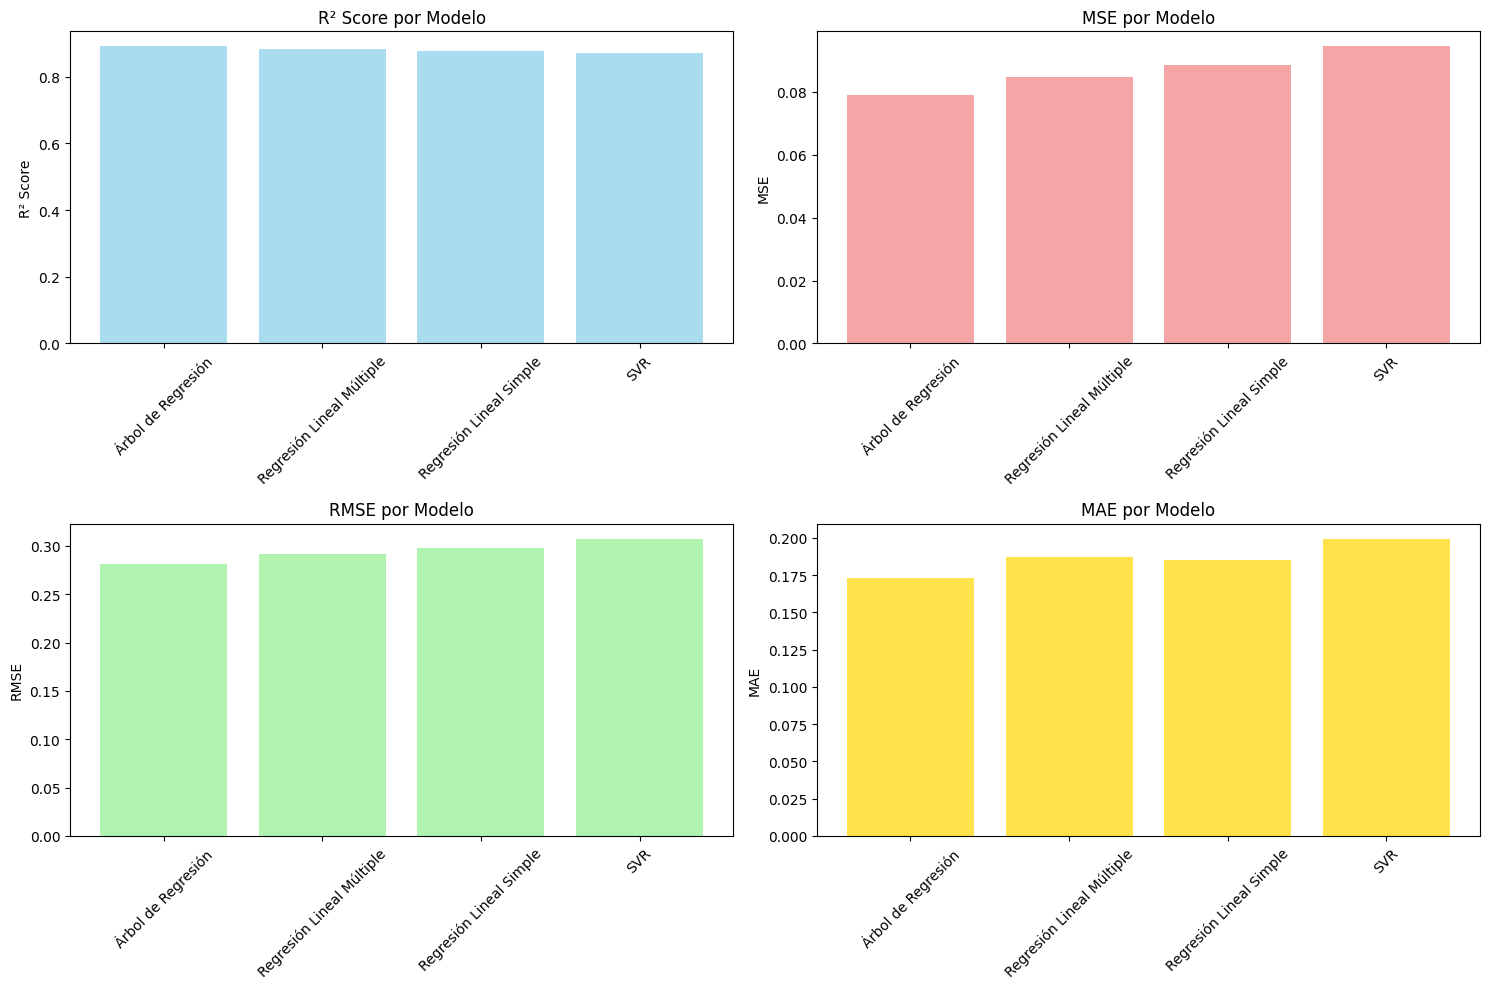

In [37]:
# Celda 6: Comparación de Resultados
resultados = pd.DataFrame({
    'Modelo': ['Regresión Lineal Simple', 'Regresión Lineal Múltiple', 'SVR', 'Árbol de Regresión'],
    'R²': [r2_simple, r2_multiple, r2_svr, r2_tree],
    'MSE': [mse_simple, mse_multiple, mse_svr, mse_tree],
    'RMSE': [rmse_simple, rmse_multiple, rmse_svr, rmse_tree],
    'MAE': [mae_simple, mae_multiple, mae_svr, mae_tree]
})

resultados = resultados.sort_values('R²', ascending=False)
print("=== COMPARACIÓN DE MODELOS ===")
print(resultados.round(4))

# Visualización de resultados
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# R²
axes[0,0].bar(resultados['Modelo'], resultados['R²'], color='skyblue', alpha=0.7)
axes[0,0].set_title('R² Score por Modelo')
axes[0,0].set_ylabel('R² Score')
axes[0,0].tick_params(axis='x', rotation=45)

# MSE
axes[0,1].bar(resultados['Modelo'], resultados['MSE'], color='lightcoral', alpha=0.7)
axes[0,1].set_title('MSE por Modelo')
axes[0,1].set_ylabel('MSE')
axes[0,1].tick_params(axis='x', rotation=45)

# RMSE
axes[1,0].bar(resultados['Modelo'], resultados['RMSE'], color='lightgreen', alpha=0.7)
axes[1,0].set_title('RMSE por Modelo')
axes[1,0].set_ylabel('RMSE')
axes[1,0].tick_params(axis='x', rotation=45)

# MAE
axes[1,1].bar(resultados['Modelo'], resultados['MAE'], color='gold', alpha=0.7)
axes[1,1].set_title('MAE por Modelo')
axes[1,1].set_ylabel('MAE')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Mejor modelo: Regresión Lineal Múltiple


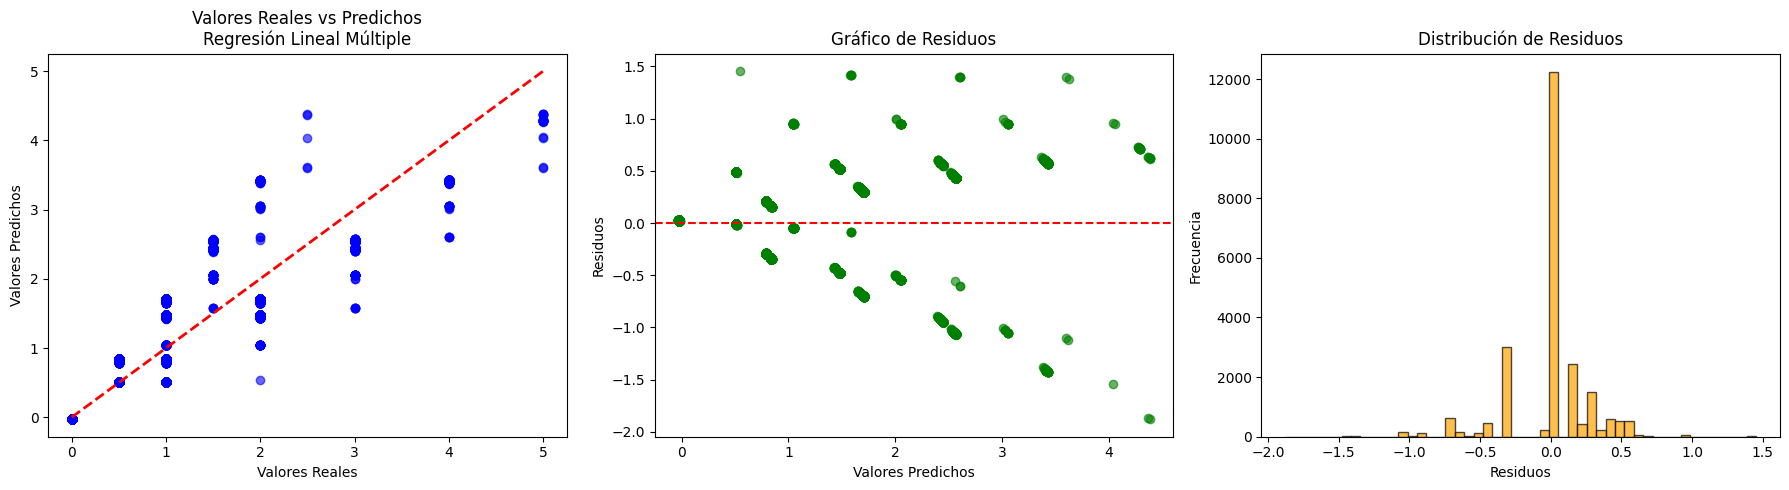


Estadísticas de residuos para Regresión Lineal Múltiple:
Media de residuos: -0.000525
Desviación estándar de residuos: 0.2911
Residuo mínimo: -1.8803
Residuo máximo: 1.4553


In [7]:
# Celda 7: Análisis de Residuos del Mejor Modelo
mejor_modelo_idx = resultados['R²'].idxmax()
mejor_modelo_nombre = resultados.loc[mejor_modelo_idx, 'Modelo']

print(f"Mejor modelo: {mejor_modelo_nombre}")

# Seleccionar predicciones del mejor modelo
if mejor_modelo_nombre == 'Regresión Lineal Simple':
    y_pred_mejor = y_pred_simple
elif mejor_modelo_nombre == 'Regresión Lineal Múltiple':
    y_pred_mejor = y_pred_multiple
elif mejor_modelo_nombre == 'SVR':
    y_pred_mejor = y_pred_svr
else:
    y_pred_mejor = y_pred_tree

# Análisis de residuos
residuos = y_test - y_pred_mejor

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico de valores reales vs predichos
axes[0].scatter(y_test, y_pred_mejor, alpha=0.6, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Valores Reales')
axes[0].set_ylabel('Valores Predichos')
axes[0].set_title(f'Valores Reales vs Predichos\n{mejor_modelo_nombre}')

# Gráfico de residuos
axes[1].scatter(y_pred_mejor, residuos, alpha=0.6, color='green')
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_xlabel('Valores Predichos')
axes[1].set_ylabel('Residuos')
axes[1].set_title('Gráfico de Residuos')

# Histograma de residuos
axes[2].hist(residuos, bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[2].set_xlabel('Residuos')
axes[2].set_ylabel('Frecuencia')
axes[2].set_title('Distribución de Residuos')

plt.tight_layout()
plt.show()

print(f"\nEstadísticas de residuos para {mejor_modelo_nombre}:")
print(f"Media de residuos: {residuos.mean():.6f}")
print(f"Desviación estándar de residuos: {residuos.std():.4f}")
print(f"Residuo mínimo: {residuos.min():.4f}")
print(f"Residuo máximo: {residuos.max():.4f}")